## Исследование данных о российском кинопрокате



Заказчик исследования — Министерство культуры Российской Федерации. 
    
Цель: изучить рынок российского кинопроката и выявить текущие тренды, исследовать фильмы, которые получили государственную поддержку.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
data_movies = pd.read_csv('/datasets/mkrf_movies.csv', sep=',')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv', sep=',')

Проверим, правильно ли подгрузились датасеты  `data_movies` с данными о прокатных удостоверениях и `data_shows` с данными о прокате в российских кинотеатрах.

In [2]:
data_movies.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [3]:
data_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Данные загрузились верно, объеденим датасеты по значениям столбца `puNumber`, для этого проверим совпадает ли тип данных в этом столбце в обоих датасетах.

In [4]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Заменим тип данных в датасете `data_movies` на целочисленный. Для этого необходимо исправить значения в столбце puNumber, где есть пропуск, на нулевое значение.

In [6]:
data_movies.loc[data_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_movies.loc[data_movies['puNumber'] == 'нет', 'puNumber'] = 0

In [8]:
data_movies['puNumber'] = data_movies['puNumber'].astype('int')

Объединяем данные из двух датасетов таким образом, чтобы все объекты из датасета `data_shows` обязательно вошли.

In [9]:
#объединяем таблицы

data_movies = data_movies.merge(data_shows, on='puNumber', how='left') 

In [10]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Все 3158 уникальных значений из столбца `box_office` присоединены без потерь.

In [11]:
data_movies.shape

(7486, 16)

Датасет содержит 7486 строк и 16 колонок.

In [12]:
data_movies.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


В данных есть аномальные значения, например, нулевая сумма кассовых сборов `box_office` и нулевой общий бюджет у фильмов. Сумма кассовых сборов, возможно, нулевая из-за того, что фильм полностью профинансирован государственной поддержкой безвозмездно в благотворительных целях, и показ фильма осуществлялся бесплатно.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [13]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Необходимо изменить тип данных в столбцах:
- `show_start_date` перевести в тип datetime, поскольку столбец содержит даты премьер фильмов
- `ratings` перевести в числовой тип, float, поскольку столбец содержит числовые данные


In [14]:
data_movies['show_start_date'] = pd.to_datetime(data_movies['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')

In [15]:
data_movies['show_start_date']

0      2015-11-27 12:00:00+00:00
1      2016-09-13 12:00:00+00:00
2      2016-10-10 12:00:00+00:00
3      2016-06-10 12:00:00+00:00
4      2015-07-29 12:00:00+00:00
                  ...           
7481   2019-12-23 12:00:00+00:00
7482   2019-12-24 12:00:00+00:00
7483   2019-12-28 12:00:00+00:00
7484   2019-12-30 12:00:00+00:00
7485   2019-12-30 12:00:00+00:00
Name: show_start_date, Length: 7486, dtype: datetime64[ns, UTC]

In [16]:
data_movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В столбце `ratings` присутствуют процентные значения (94%, 28% и т.д.). У Кинопоиска рейтинг рассчитывается по сложной формуле, возможно, в процентах указан необходимый порог голосов.

In [17]:
data_movies.loc[data_movies['ratings'] > '90%']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4295.00
2126,Поездка к матери,111002015,2015-03-02 12:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.00
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,94%,"фантастика,боевик,комедия",334750.00
3514,Чужой дом,111015516,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Лига Продакшн""","Россия, Грузия, Хорватия, Испания",Р.Глурджидзе,"З.Магалашвили, К.Гечмен-Вальдек, Н.Горшкова",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,91%,драма,NaN
3585,"Машины Страшилки. Серия ""Жутчайшая повесть о п...",114003916,2016-12-09 12:00:00+00:00,Анимационный,"ООО Студия ""АНИМАККОРД"", АНИМАККОРД ЛТД.","Россия, Республика Кипр",Д.Червяцов,"Д.Ловейко, О.Кузовков",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,97%,"мультфильм,ужасы,фэнтези",NaN
3948,Круиз.,211038210,2010-09-03 12:00:00+00:00,Художественный,"ООО ""ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС""",Россия,И.Ромащенко,Р.Атамалибеков,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"приключения,комедия,фэнтези",NaN
5821,Свинья,121007018,2018-04-11 12:00:00+00:00,Художественный,"Дарк Прекёрсор Продакшен, Филмиран, Хедейт Филм",Иран,Мани Хагиги,Мани Хагиги,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,94%,"триллер,драма",1587221.51


Если посмотреть в интернете, то у некоторых фильмов, указанных выше, рейтинг в Кинопоиске еще формируется, так как недостаточно оценок. У некоторых фильмов рейтинг есть, но он совсем не совпадает с процентным значением, указанным в столбце, поэтому заменим эти значения на NaN.

In [18]:
percent_ratings = ['99%', '28%', '97%', '83%', '64%', '91%', '94%', '62%', '79%', '90%', '19%', '88%', '89%', '98%']

In [19]:
data_movies.loc[data_movies['ratings'].isin(percent_ratings),'ratings'] = np.nan

In [20]:
data_movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

Процентные значения переведены в NaN. Теперь можно перевести `ratings` в числовой тип.

In [21]:
data_movies['ratings'] = pd.to_numeric(data_movies['ratings'])

In [22]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Вывод**:
- перевели столбец `show_start_date` в тип datetime;
- заменили процентные значения в `ratings` на NaN, затем перевели тип данных в столбце на вещественный.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Проверим данные на явные дубликаты, от которых можно будет сразу избавиться.

In [23]:
data_movies.duplicated().sum()

0

Полностью одинаковых строк в данных нет.

In [24]:
data_movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

- `film_studio` содержит 0,24% пропусков.
- `production_country` содержит 0,02% пропусков. Скорее всего, пропуски можно заполнить, поискав фильмы в интернете.
- `director` содержит 0,12% пропусков. Скорее всего, пропуски также можно будет заполнить, посмотрев информацию в интернете.
- `producer` содержит 7,6% пропусков. 
- `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` содержат 96% пропусков. Однако эти данные, вероятно, заполнены только для фильмов с государственной поддержкой, поэтому логично, что будут пропуски в этих столбцах.
- `ratings` содержит 13% пропусков. 
- `genres` содержит 13% пропусокв. 
- `box_office` содержит 58% пропусков.

Заполним пропуски в столбце `production_country`.

In [25]:
data_movies[data_movies['production_country'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


На сайте Кинопоиска в стране-производитель у обоих фильмов указана Россия.

In [26]:
data_movies['production_country'] = data_movies['production_country'].fillna('Россия')

In [27]:
#проверяем, верно ли заполнились пропуски

data_movies.loc[data_movies.loc[:, 'puNumber'] == 111001216]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0


In [28]:
data_movies.loc[data_movies.loc[:, 'puNumber'] == 214000410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Посмотрим пропуски в столбце `film_studio`

In [29]:
data_movies[data_movies['film_studio'].isna()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Если смотреть в интернете, то во многих фильмах в Кинопоиске также не указана студия-производитель, возможно, это авторское кино. Оставим пропуски, как есть, поскольку чем-то одним мы заменить не можем, а искать студии в интернете будет слишком трудозатратно.

Посмотрим пропуски в столбце `director`

In [30]:
data_movies[data_movies['director'].isna()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


In [31]:
data_movies.loc[data_movies['puNumber'] == 214000410, 'director'] = 'В. Пичул, Ю. Владовский'

In [32]:
data_movies.loc[data_movies['puNumber'] == 126002711, 'director'] = 'Б.Лич'

Остальные фильмы отсутствуют в Кинопоиске или на месте режиссера имеют пропуск, так что оставим пропуски, как есть.

In [33]:
data_movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    7
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

**Вывод:**
- `film_studio` содержит 0,24% пропусков. Вручную заполнять студии-производители будет трудозатратно, поэтому оставим пропуски.
- `production_country` содержит 0,02% пропусков. Было 2 пропуска, оба фильма из России, поэтому мы заполнили их.
- `director` содержит 0,12% пропусков. Было 9 пропусков, заполнили только 2 из них, поскольку по остальным фильмам не было данных.
- `producer` содержит 7,6% пропусков. Заполнять пропуски вручную по каждому фильму будет трудозатратно, поэтому оставим пропуски, как они есть. 
- `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` содержат 96% пропусков. Однако эти данные, вероятно, заполнены только для фильмов с государственной поддержкой, поэтому логично, что будут пропуски в этих столбцах.
- `ratings` содержит 13% пропусков. Медианное или среднее значение может сместить выводы в ту или иную сторону, поэтому было бы некорректно заполнять пропуски. Оставим, как есть.
- `genres` содержит 13% пропусков. Нет данных для заполнения, поэтому оставим, как есть.
- `box_office` содержит 58% пропусков. Нет данных для заполнения.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим дубли в столбце `puNumber`.

In [34]:
data_movies['puNumber'].duplicated().sum()

2

In [35]:
data_movies[data_movies['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Есть дубли в номерах прокатных удостоверений, то есть под одним удостоверением выходило в прокат несколько фильмов. С фильмами "Анализируй это!", "Анализируй то!" одно удостоверение возможно, поскольку вторая часть - это продолжение первого фильма. Однако с фильмами с удостоверением № 221154310 - странная ситуация, поскольку у разных фильмов должны быть разные удостоверения. Если проверять в реестре на официальном сайте, то ошибки в выгрузке данных нет, поскольку в открытых данных так и заявлено: под одним номером - два фильма.

Оставим эти дубли как есть, поскольку фильмы разные, то при удалении мы потеряем один фильм с уникальной информацией по нему.

Проверим дубли в столбце `title`.

In [36]:
data_movies[data_movies['title'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


In [37]:
data_movies['title'].duplicated().sum()

714

Есть 714 дублей в названиях фильмов. Скорее всего, некоторые фильмы были выданы с разными удостоверениями. Это частая ситуация, поскольку фильмы были выпущены в прокат в разное время, а значит могли поменять правообладателя, цель проката и т.д. 

In [38]:
data_movies[data_movies['title'].duplicated()].head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.0
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.0
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"фэнтези,приключения,семейный",843310.0
132,Джейн Эйр /По одноименному роману Шарлотты Бро...,221035716,2016-06-07 12:00:00+00:00,Художественный,"Чинеритино, Флаш Фильм, Медиасет, Мирамакс, Ро...",Франция - Италия - Великобритания - США,Франко Дзеффирелли,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"драма,мелодрама",NaN
205,Кинг Конг _,221001815,2015-02-11 12:00:00+00:00,Художественный,"Биг Праймейт Пикчерз, Юниверсал Пикчерз, ВингН...",Новая Зеландия - США,Питер Джексон,"Йен Бленкин, Питер Джексон, Кэролайн Каннингэм...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"боевик,драма,мелодрама",NaN
268,Пуленепробиваемый.,121009103,2013-03-13 12:00:00+00:00,Художественный,"Лейкшор Интертейнмент, Мозаик Медиа Груп, Сайн...",США,Пол Хантер,"Джон Ву, Чарльз Ровен, Дуглас Сегал, Теренс Чанг",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.7,"фэнтези,боевик,комедия",NaN
379,Рапунцель: Запутанная история,224026712,2012-10-23 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,"мультфильм,мюзикл,фэнтези",NaN


In [39]:
data_movies[data_movies['title'] == 'Белоснежка и охотник']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
445,Белоснежка и охотник,221030916,2016-06-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Рот Филмз",США,Руперт Сандерс,"Сэм Мерсер, Палак Патель, Джо Рот",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"фэнтези,боевик,драма",NaN
446,Белоснежка и охотник,121013012,2012-05-25 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Рот Филмз",США,Руперт Сандерс,"Сэм Мерсер, Палак Патель, Джо Рот",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"фэнтези,боевик,драма",470427.0
447,Белоснежка и охотник,221053712,2012-07-17 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Рот Филмз",США,Руперт Сандерс,"Сэм Мерсер, Палак Патель, Джо Рот",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"фэнтези,боевик,драма",NaN
448,Белоснежка и охотник,221077812,2012-12-11 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Рот Филмз",США,Руперт Сандерс,"Сэм Мерсер, Палак Патель, Джо Рот",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"фэнтези,боевик,драма",NaN


Заметим, что у нас четыре одинаковых фильма "Белоснежка и охотник", но с разными удостоверениями, датами показов и также только в одном из удостоверений указаны сборы в рублях. 

Таким образом, лучше не удалять эти дубли, поскольку мы можем потерять номера удостоверений и информацию о сборах. 

In [40]:
data_movies['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

**Вывод:**
- В столбце `puNumber` были найдены 2 дубликата с одинаковыми удостоверениями, однако оставим их, как есть, поскольку в строках указаны разные фильмы.
- В стольце `title` есть 714 дублей, однако фильмы показывались в разное время и, возможно, с разными целями, поэтому оставим дубли, как есть, чтобы не потерять часть данных об удостоверениях, показах и сборах.

В остальных столбцах значения могут повторяться. В качестве причин возникновения дублей в удостоверениях могут быть ошибки в реестре фильмов, сотрудники при вводе данных могли ошибиться, и возникла путаница. 

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

In [41]:
data_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Есть дубликаты в типах фильмов: Художественный и Анимационный, из-за лишних пробелов перед названиями.

In [42]:
data_movies['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [43]:
data_movies['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [44]:
data_movies['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [45]:
data_movies['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

Заметим, что почти все столбцы имеют значения, разделенные запятыми без пробелов (`genres`). Удалим пробелы в столбце `type`.

In [46]:
#удалим пробелы, встречающиеся в начале строки

data_movies['type'] = data_movies['type'].str.strip()

In [47]:
data_movies['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

**Вывод:**

В столбце `type` убрали лишние пробелы для устранения дубликатов.

Общая проблема: в остальных столбцах также есть дубликаты, например, "комедия,мелодрама,драма" и "триллер, драма, мелодрама" или повторяющиеся страны-производители. Но такие дубли не исправить, поэтому оставим так.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

In [48]:
data_movies.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.479245,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.101665,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


In [49]:
data_movies[data_movies['budget'] == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Есть фильмы с нулевым бюджетом, однако финансировались они за счет возвратных или невозвратных средств государственной поддержки. Это означает, что у фильма не может общий бюджет составлять 0, ведь его профинансировали за счет государственных средств. 

In [50]:
data_movies.query('budget < (refundable_support + nonrefundable_support)')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Для заполнения нулевых бюджетов напишем функцию, в которой если бюджет будет меньше суммы гос.поддержки, то будем прибавлять эту сумму к общему бюджету. Таким образом заполним аномальные значения.

In [51]:
def calculate_budget(row):
    total_budget = row['refundable_support'] + row['nonrefundable_support']
    if row['budget'] < total_budget:
        return row['budget'] + total_budget
    return row['budget']


In [52]:
data_movies['budget'] = data_movies.apply(calculate_budget, axis = 1)

In [53]:
#проверим, правильно ли заполнились нулевые бюджеты

data_movies[data_movies['puNumber'] == 111000415]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,75000000.0,Фонд кино,6.6,драма,446163511.0


In [54]:
data_movies[data_movies['budget'] == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [55]:
data_movies[data_movies['box_office'] == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,"драма,биография,музыка",0.0
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,драма,0.0
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,комедия,0.0
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.5,"драма,военный,история",0.0
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"аниме,мультфильм,драма",0.0
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.7,"аниме,мультфильм,фантастика",0.0
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,биография,0.0
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"комедия,мелодрама",0.0
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"мелодрама,комедия,драма",0.0
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.9,драма,0.0


In [56]:
data_movies.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.314224e+08,6.479245,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.871482e+08,1.101665,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+06,1.000000,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.552480e+07,5.900000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,7.119690e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.500000e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


Заменили все значения с нулевым бюджетом на сумму гос.поддержки. 

Также у нас есть нулевое прокатное удостоверение `puNumber`, но оно обозначает пропуск в данных, который мы заполнили в самом начале обработки.

Минимальное значение прокатных сборов `box_office` равно нулю, что тоже может быть аномальным значением. Однако эти значения не удастся заполнить, а удаление данных приведет к потере части фильмов.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [57]:
#создаем столбец с годом проката фильма

data_movies['year_show_start'] = data_movies['show_start_date'].dt.year
data_movies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Для этого сначала преобразуем столбец Series в строку, а затем разделим ее.

In [58]:
data_movies['director_first'] = data_movies['director'].str.split(',').str[0]
data_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start,director_first
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов


In [59]:
data_movies['genre_first'] = data_movies['genres'].str.split(',').str[0]
data_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start,director_first,genre_first
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


In [60]:
data_movies['genre_first'].unique()

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', nan, 'военный', 'документальный',
       'фэнтези', 'криминал', 'приключения', 'аниме', 'детектив',
       'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное ТВ'], dtype=object)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [61]:
data_movies['percentage_support'] = (data_movies['refundable_support'] + data_movies['nonrefundable_support']) \
/ data_movies['budget']

data_movies['percentage_support'].value_counts()

1.000000    17
0.649351     6
0.700000     5
0.657895     5
0.500000     5
            ..
0.600000     1
0.689474     1
0.784745     1
0.661977     1
0.225262     1
Name: percentage_support, Length: 282, dtype: int64

**Вывод:**
- Был добавлен столбец с информацией о годе проката;
- Был добавлен столбец с именем и фамилией главного режиссёра фильма;
- Был добавлен столбец с основным жанром фильма;
- Был добавлен столбец с долей государственной поддержки от общего бюджета фильма.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [62]:
#посчитаем фильмы, по которым указана информация о показах в кинотеатрах

percent_box = data_movies.groupby('year_show_start')['box_office'].count().sum()

percent_box

3158

In [63]:
#посчитаем долю, которую составляют фильмы с информацией о прокате от всех фильмов в датасете

percent = percent_box / len(data_movies)

percent

0.42185412770504943

В наших данных только 42% фильмов имеют информацию о прокате. Посмотрим, сколько фильмов выходило в прокат каждый год.

In [64]:
pivot_film_box = data_movies.pivot_table(index='year_show_start', values='box_office', aggfunc=['count'])

pivot_film_box

,count
,box_office
year_show_start,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357


In [66]:
#общее количество фильмов, получавших прокатное удостоверение, по годам

pivot_total = data_movies.pivot_table(index='year_show_start', values='puNumber', aggfunc=['count'])

pivot_total

,count
,puNumber
year_show_start,
2010,985
2011,622
2012,593
2013,630
2014,807
2015,705
2016,818
2017,505


Вычислим, какую долю составляют фильмы с данными о кассовых сборах в прокате от общего количества фильмов по каждому году.

In [67]:
pivot_total2 =  pivot_film_box.merge(pivot_total, on='year_show_start').reset_index()
pivot_total2.columns = ['year_show_start','box_office', 'puNumber']
pivot_total2['perc_box'] = pivot_total2['box_office'] / pivot_total2['puNumber'] * 100

pivot_total2

,year_show_start,box_office,puNumber,perc_box
0,2010,105,985,10.659898
1,2011,109,622,17.524116
2,2012,128,593,21.585160
3,2013,184,630,29.206349
4,2014,279,807,34.572491
5,2015,465,705,65.957447
6,2016,526,818,64.303178
7,2017,357,505,70.693069
8,2018,475,891,53.310887
9,2019,530,930,56.989247


Полнее всего представлен период с 2015 г., поскольку данных по прокатам с 2010-2014 гг. слишком мало по сравнению с общим количеством фильмов. 

<AxesSubplot:xlabel='year_show_start', ylabel='perc_box'>

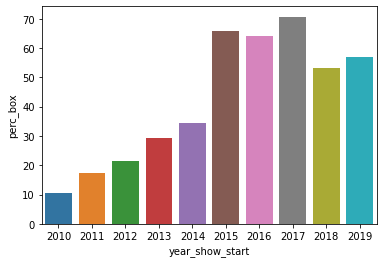

In [68]:
sns.barplot(x='year_show_start', y='perc_box', data=pivot_total2)

Самая большая доля фильмов, вышедших в прокат, была в 2017 г., после этого доля прокатных фильмов снова снизилась с 70% до 50%.

Выведем график с количеством всех фильмов, вышедших в прокат, по годам

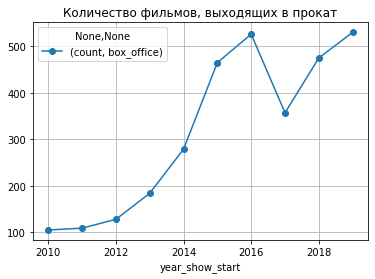

In [65]:
(
    data_movies.pivot_table(index='year_show_start', values='box_office', aggfunc=['count'])
    .plot(grid= True, style='o-')
)
plt.title('Количество фильмов, выходящих в прокат')
plt.show()

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [69]:
pivot_box_sum = data_movies.pivot_table(index='year_show_start', values='box_office', aggfunc=['sum', 'count'])

pivot_box_sum

,sum,count
,box_office,box_office
year_show_start,,
2010,2.428654e+06,105
2011,1.410276e+07,109
2012,6.955423e+06,128
2013,2.979971e+07,184
2014,7.444952e+09,279
2015,3.949737e+10,465
2016,4.786630e+10,526
2017,4.856371e+10,357


Меньше всего наблюдений приходится на 2010-2014 гг. Начиная с 2015 г. данных по сборам становится больше.

Для наглядности построим график, где ось x - годы, а ось у - сумма кассовых сборов.

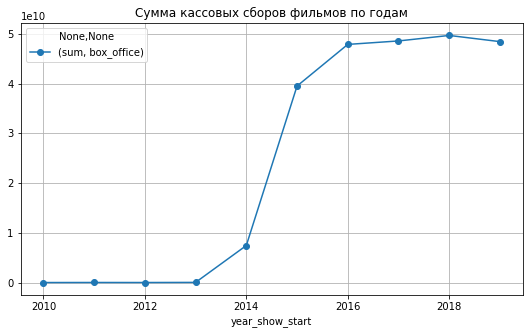

In [70]:
(
    data_movies.pivot_table(index='year_show_start', values='box_office', aggfunc = ['sum'])
    .plot(grid= True, style='o-', figsize=(9,5))
)
plt.title('Сумма кассовых сборов фильмов по годам')
plt.show()

Исходя из графика, максимальная сумма сборов была достигнута в 2018 г. ~ 49 млрд.руб. Минимальная сумма сборов в 2015 г. с поправкой на то, что у нас мало данных по этим годам. 

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [71]:
pivot_box_office = data_movies.pivot_table(index='year_show_start', values='box_office', aggfunc = ['mean', 'median'])

pivot_box_office

,mean,median
,box_office,box_office
year_show_start,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000


Заметим, что данные неравномерны, то есть присутствуют очень большие значения.

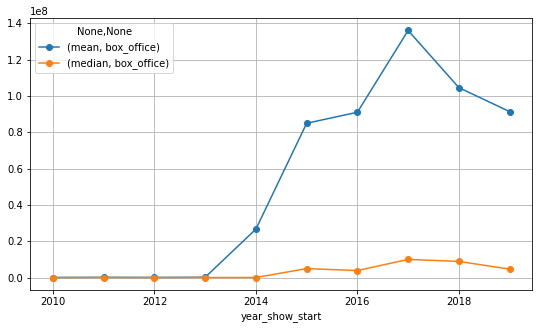

In [72]:
(
    data_movies.pivot_table(index='year_show_start', values='box_office', aggfunc = ['mean', 'median'])
    .plot(grid= True, style='o-', figsize=(9,5))
)
plt.show()

Медиана и среднее значение существенно различаются. Возможно, какое-то кино имело большой успех и по кассовым сборам набрало рекордные суммы, что повлияло на расчет среднего значения, поскольку сборы разных кино могут иметь большую разницу в суммах.

Так, в 2017 г. медианное значение составило 9 млн., тогда как среднее значение равно 136 млн.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [73]:
filter_year = data_movies.query('2015 <= year_show_start')

In [74]:
table = filter_year.pivot_table(index='age_restriction', values='box_office', aggfunc=['sum']).reset_index()
table

,age_restriction,sum
,,box_office
0,«0+» - для любой зрительской аудитории,8.090774e+08
1,«12+» - для детей старше 12 лет,6.061945e+10
2,«16+» - для детей старше 16 лет,7.603473e+10
3,«18+» - запрещено для детей,4.075962e+10
4,«6+» - для детей старше 6 лет,5.579861e+10


В период с 2015 по 2019 гг. больше всего сборов у фильмов с пометкой 16+

In [75]:
table_age_year = filter_year.groupby(['year_show_start', 'age_restriction'])['box_office'].agg('sum').reset_index()
table_age_year

,year_show_start,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,3.790546e+08
1,2015,«12+» - для детей старше 12 лет,1.361608e+10
2,2015,«16+» - для детей старше 16 лет,1.136812e+10
3,2015,«18+» - запрещено для детей,5.432308e+09
4,2015,«6+» - для детей старше 6 лет,8.701799e+09
5,2016,«0+» - для любой зрительской аудитории,1.502288e+08
6,2016,«12+» - для детей старше 12 лет,1.220445e+10
7,2016,«16+» - для детей старше 16 лет,1.666455e+10
8,2016,«18+» - запрещено для детей,6.793930e+09
9,2016,«6+» - для детей старше 6 лет,1.205315e+10


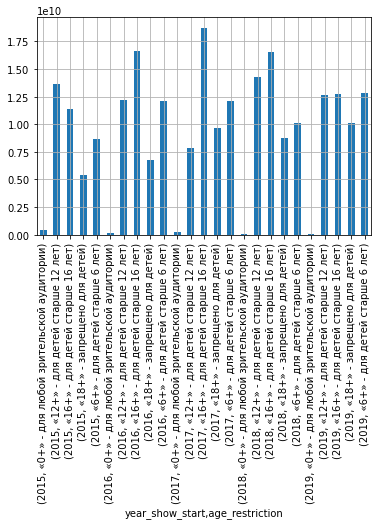

In [76]:
(
   filter_year.groupby(['year_show_start', 'age_restriction'])['box_office'].agg('sum')
    .plot(kind='bar', grid= True, x='year_show_start', y='box_office')
)
plt.show()

На данном графике видно, что в 2015 г. по кассовым сборам преобладали картины 12+, но затем в последующие годы самыми кассовыми фильмами были картины с категорией 16+.

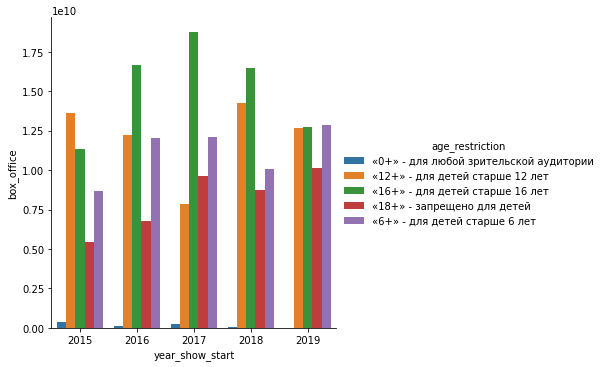

In [77]:
#переделаем график в более наглядный вид

sns.catplot(x='year_show_start', y='box_office', data = table_age_year , kind='bar', hue='age_restriction')

Здесь нагляднее видно, что на протяжении 2016-2018 гг. фильмы с категорией 16+ собирали больше всего денег в прокате. В 2015 г. самыми кассовыми фильмами были картины 12+, а в 2019 г. - 16+ и 6+.

**Вывод**:
- Полнее всего в данных представлен период с 2015 г., поскольку в 2010-2014 гг. представлено слишком мало картин, вышедших в прокат. Самая большая доля фильмов, вышедших в прокат, была в 2017 г. 
- Максимальная сумма сборов была достигнута в 2018 г. ~ 49 млрд.руб., а минимальная в 2015 г. ~ 39 млрд.руб.
- Медианное и среднее значение кассовых сборов значительно отличаются. Так, в 2017 г. медианное значение составило 9 млн., тогда как среднее значение равно 136 млн.
- В период с 2015 по 2019 гг. больше всего сборов у фильмов с пометкой 16+. Такая же ситуация наблюдается в динамике по годам.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Рассмотрим фильмы с гос.поддержкой, для этого отфильтруем строки с бюджетом без пропусков.

In [78]:
budget1 = data_movies[data_movies['budget'].isna() == False].copy()
budget1

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start,director_first,genre_first,percentage_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,2014,А.Якимчук,NaN,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,0.510204
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,0.526316
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.529661
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.649998


In [79]:
#разница между кассовыми сборами и бюджетом

budget1['pay_back'] = budget1['box_office'] - budget1['budget']

In [80]:
budget1.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,year_show_start,percentage_support,pay_back
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,314.000000,3.180000e+02,332.000000,332.000000,3.180000e+02
mean,1.115938e+08,1.186446e+07,4.898099e+07,1.314224e+08,6.000637,1.324324e+08,2016.719880,0.542098,4.256980e+05
std,5.703031e+06,2.491656e+07,5.998012e+07,1.871482e+08,1.123948,3.348379e+08,1.640637,0.196925,3.159104e+08
min,1.110001e+08,0.000000e+00,0.000000e+00,6.000000e+06,1.000000,1.550000e+03,2013.000000,0.044043,-1.971477e+09
25%,1.110049e+08,0.000000e+00,2.500000e+07,4.552480e+07,5.300000,1.236676e+06,2015.000000,0.384615,-7.069443e+07
50%,1.110104e+08,0.000000e+00,3.000000e+07,7.119690e+07,6.200000,1.572007e+07,2017.000000,0.614038,-4.068082e+07
75%,1.110178e+08,1.500000e+07,4.037500e+07,1.500000e+08,6.700000,1.063730e+08,2018.000000,0.661412,-2.362182e+06
max,2.140101e+08,1.800000e+08,4.000000e+08,2.305074e+09,8.500000,3.073569e+09,2019.000000,1.000000,2.913569e+09


Среднее соотношение государственной поддержки к общему бюджету 54%, то есть в среднем половина бюджета у фильма финансируется за счет гос.средств. При этом среднее значение чистой прибыли равняется 425 тыс.руб. Можно предположить, что малое количество фильмов окупается, а хитов, которые бы окупились с большой чистой прибылью достаточно мало.

In [81]:
support_rate = budget1.pivot_table(index='year_show_start', values='percentage_support', aggfunc= ['count', 'mean'])
support_rate

,count,mean
,percentage_support,percentage_support
year_show_start,,
2013,2,0.473197
2014,16,0.551318
2015,86,0.561975
2016,61,0.574673
2017,41,0.506221
2018,56,0.544880
2019,70,0.507940


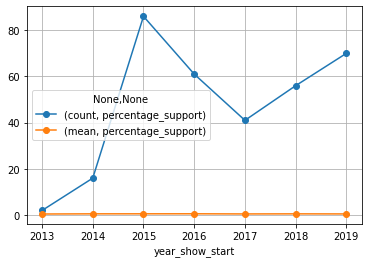

In [82]:
#построим график с количеством фильмов с гос.поддеркжой и средним значением доли гос.поддержки по годам
(
budget1.pivot_table(index='year_show_start', values='percentage_support', aggfunc= ['count', 'mean'])
    .plot(grid=True, style='o-')
)
plt.show()

Больше всего фильмов, получивших гос.поддержку было в 2015 г и в 2019 г. Меньше всего поддержки получили фильмы в 2017 г.

In [83]:
#посмотрми данные по окупаемости фильмов по годам

pay_back = budget1.pivot_table(index='year_show_start', values='pay_back', aggfunc= ['median', 'mean'])
pay_back

,median,mean
,pay_back,pay_back
year_show_start,,
2013,-1.175565e+08,-1.175565e+08
2014,-3.812277e+07,-1.781641e+07
2015,-3.880566e+07,-2.248688e+07
2016,-5.200880e+07,-2.424215e+07
2017,-3.322228e+07,1.003462e+08
2018,-3.759403e+07,5.238223e+07
2019,-4.590981e+07,-4.709077e+07


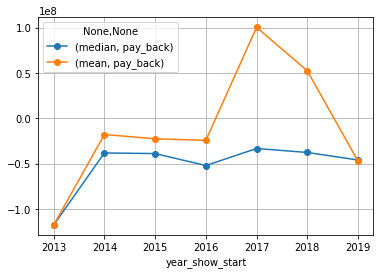

In [84]:
#построим график с окупаемостью фильмов по годам

(
budget1.pivot_table(index='year_show_start', values='pay_back', aggfunc= ['median', 'mean'])
    .plot(grid=True, style='o-')
)
plt.show()

Интересно, что больше всего фильмов было профинансировано в 2015 г. и в 2019 г., но при этом фильмы окупились только в 2017-2018 гг. Зачастую фильмы с гос.поддержкой не окупаются, а становятся убыточными. В 2017 г. чистая прибыль составила 100 млн. руб.

In [85]:
#посмотрим рейтинг фильмов с гос.поддержкой

rate_rating = budget1.pivot_table(index='year_show_start', values='ratings', aggfunc=['mean', 'median'])
rate_rating                                  

,mean,median
,ratings,ratings
year_show_start,,
2013,6.700000,6.7
2014,6.006667,6.4
2015,6.064198,6.2
2016,5.677193,5.8
2017,6.000000,6.2
2018,6.001887,6.2
2019,6.176119,6.2


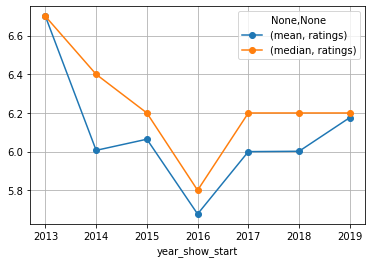

In [86]:
#построим график с рейтингом фильмов, финансировавшихся за счет гос.средств
(
budget1.pivot_table(index='year_show_start', values='ratings', aggfunc=['mean', 'median'])
    .plot(grid=True, style='o-')
)
plt.show()    

Самые низкие рейтинги получили фильмы с гос.поддержкой в 2016 г., в целом средний рейтинг фильмов с поддержкой не превышает 6-7 баллов на Кинопоиске.

In [87]:
budget1.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,year_show_start,percentage_support,pay_back
puNumber,1.000000,0.010413,-0.030194,-0.016573,0.038466,0.053665,-0.017975,0.010212,-0.009130
refundable_support,0.010413,1.000000,0.359622,0.654865,0.004850,0.312137,0.089616,0.003491,-0.041968
nonrefundable_support,-0.030194,0.359622,1.000000,0.621026,0.141521,0.455729,0.117645,0.132406,0.138162
budget,-0.016573,0.654865,0.621026,1.000000,0.101342,0.375631,0.164391,-0.283001,-0.187338
ratings,0.038466,0.004850,0.141521,0.101342,1.000000,0.155149,0.044702,-0.049547,0.095602
box_office,0.053665,0.312137,0.455729,0.375631,0.155149,1.000000,0.119278,-0.084591,0.839991
year_show_start,-0.017975,0.089616,0.117645,0.164391,0.044702,0.119278,1.000000,-0.092796,0.027103
percentage_support,0.010212,0.003491,0.132406,-0.283001,-0.049547,-0.084591,-0.092796,1.000000,0.085326
pay_back,-0.009130,-0.041968,0.138162,-0.187338,0.095602,0.839991,0.027103,0.085326,1.000000


Есть корреляция только между бюджетом и суммой гос.поддержки, но это очевидно, потому что с гос.поддержкой общий бюджет растет. Больше существенных корреляций нет. Рейтинг фильма и гос.поддержка никак не взаимосвязаны, то есть рейтинг фильма никак не зависит от выделенной суммы гос. поддержки.

Изучим, какие типы фильмов чаще всего получают поддержку.

In [88]:
table_type_film = budget1.groupby(['year_show_start', 'type'])['percentage_support'].agg('median').reset_index()
table_type_film

,year_show_start,type,percentage_support
0,2013,Художественный,0.473197
1,2014,Анимационный,0.277239
2,2014,Художественный,0.624764
3,2015,Анимационный,0.482160
4,2015,Художественный,0.629630
5,2016,Анимационный,0.500000
6,2016,Художественный,0.642777
7,2017,Анимационный,0.286591
8,2017,Художественный,0.566996
9,2018,Анимационный,0.478251


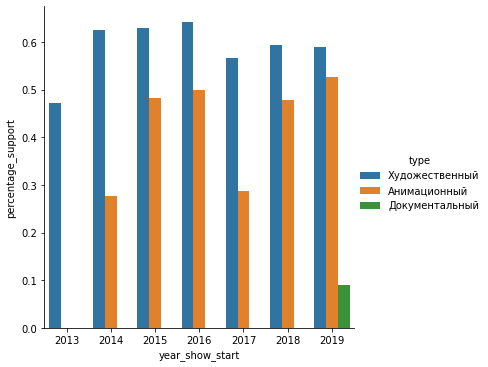

In [89]:
sns.catplot(x='year_show_start', y='percentage_support', data = table_type_film , kind='bar', hue='type')

В основном, в снятых фильмах с гос.поддержкой преобладают художественные фильмы.

Изучим, какие жанры фильмов наиболее популярны среди фильмов с поддержкой.

In [90]:
genre_top = budget1.groupby('genre_first')['percentage_support'].agg(['count', 'median']).reset_index()

genre_top

,genre_first,count,median
0,биография,3,0.210000
1,боевик,6,0.509758
2,военный,9,0.351354
3,детектив,5,0.559303
4,детский,4,0.667229
5,драма,93,0.620361
6,история,4,0.385147
7,комедия,74,0.596324
8,криминал,3,0.656250
9,мелодрама,15,0.440373


In [91]:
genre_top.sort_values(by='count', ascending=False)

,genre_first,count,median
5,драма,93,0.620361
7,комедия,74,0.596324
10,мультфильм,31,0.444444
16,триллер,15,0.615751
9,мелодрама,15,0.440373
18,фантастика,11,0.529661
19,фэнтези,11,0.625000
17,ужасы,10,0.641641
2,военный,9,0.351354
12,приключения,7,0.428555


Самые популярные жанры, получившие гос.поддержку:
1. драма
2. комедия
3. мультфильм

In [97]:
budget1['support_sum'] = budget1['refundable_support'] + budget1['nonrefundable_support']
budget1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year_show_start,director_first,genre_first,percentage_support,pay_back,support_sum
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.333703,-79046546.4,26500000.0
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,NaN,0.700000,-37114717.0,26000000.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.612691,-156066458.5,107847945.0
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095,-40518222.5,28000000.0
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,0.624764,-39783022.0,25000000.0


In [105]:
director_table = budget1.groupby('director_first')['support_sum'].agg(['count','mean','median']).reset_index()

director_table.sort_values(by='median', ascending=False).head(10)

,director_first,count,mean,median
0,Ф.Бондарчук,1,500000000.0,500000000.0
31,А.Кравчук,1,500000000.0,500000000.0
42,А.Мизгирев,1,450000000.0,450000000.0
186,Н.Лебедев,1,442104482.0,442104482.0
39,А.Мегердичев,1,400000000.0,400000000.0
140,И.Шурховецкий,1,350000000.0,350000000.0
63,А.Учитель,1,300000000.0,300000000.0
194,Н.Хомерики,3,220000000.0,300000000.0
201,О.Степченко,1,270000000.0,270000000.0
101,Д.Козловский,1,260000000.0,260000000.0


Самое большую сумму гос. поддержки получил Ф. Бондарчук в размере 500 млн.руб.

**Вывод**:
- Фильмы с государственной поддержкой в среднем не окупаются, однако государственный фонд имеет прибыль за счет фильмов-хитов, которые имеют успех.
- Больше всего по количеству фильмов, получивших гос.поддержку, наблюдались в 2015 и в 2019 гг.
- В основном рейтинг у фильмов с поддержкой около 6 баллов на Кинопоиске.
- Больше всего средств выделяют на съемку художественных фильмов.
- Корреляций между рейтингом фильма и суммой поддержки нет.
- Больше всего фильмов с гос.поддержкой имеют жанры: драма, комедия, мультфильм.

### Шаг 5. Напишите общий вывод

**Цель проекта**: изучить рынок российского кинопроката и выявить текущие тренды.

**Задачи**:

- обзор полученных данных;
- подготовка данных к анализу;
- изучить динамику кассовых сборов у фильмов по годам;
- изучить среднюю и медианную сумму сборов;
- выявить возрастную категорию фильмов, которая преобладает по кассовым сборам;
- составить выводы по полученным результатам.



**Текущие тренды в российском кинопрокате**:
- Полнее всего в данных представлен период с 2015 г. по 2019 г., поскольку в 2010-2014 гг. представлено слишком мало картин, вышедших в прокат. Самая большая доля фильмов, вышедших в прокат, была в 2017 г. 
- Максимальная сумма сборов была достигнута в 2018 г. ~ 49 млрд.руб., а минимальная в 2015 г. ~ 39 млрд.руб.
- Медианное и среднее значение кассовых сборов значительно отличаются. Так, в 2017 г. медианное значение составило 9 млн., тогда как среднее значение равно 136 млн.
- В период с 2015 по 2019 гг. больше всего сборов у фильмов с пометкой 16+. Если рассматривать в динамике, то в 2017 году картины с возрастным ограничением 16+ принесли больше всех денег, но в 2015 г. более прибыльным было кино с возрастом 12+.


**Особенности фильмов, получивших государственную поддержку**:
- В среднем государство выделяет средства, финансирующие 50% общего бюджета фильма.
- Фильмы с государственной поддержкой в среднем не окупаются, однако государственный фонд имеет прибыль за счет фильмов-хитов, которые имеют успех.
- В 2015 г. и в 2019 г. больше всего фильмов получили государственную поддержку.
- Самые плохие фильмы с поддержкой с низким рейтингом наблюдались в 2016 г. В среднем рейтинг у фильмов с поддержкой около 6 баллов на Кинопоиске.
- Больше всего средств выделяют на съемку художественных фильмов, а самыми популярными жанрами являются драма, комедия и мультфильм.
- Сумма поддержки никак не влияет на общий рейтинг фильма.


**Рекомендация**:
- проверить дубли в прокатных удостоверениях, поскольку под одним удостоверением не может выпуститься два разных фильма. 
- перепроверить фильмы с нулевыми прокатными сборами, поскольку у таких фильмов пропуски в столбцах с гос.поддержкой и в общем бюджете. Не совсем понятно, за счет чего такие фильмы финансировались и где транслировались.